# Using Seaborn and Matplotlib to Visualize Data

In [3]:
import pandas as pd
import numpy as np
import os 

### Load the Dataset 



In [4]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "censusData.csv")
df = pd.read_csv(filename, header=0)

### Glance at the Data

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,State-gov,112074,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Non-Female,0,0,45,United-States,<=50K
1,35,Private,32528,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Non-Female,0,0,45,United-States,<=50K
2,21,Private,270043,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
3,45,Private,168837,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,24,Canada,>50K
4,39,Private,297449,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,40,United-States,>50K


###  Get the Dimensions of the Dataset

In [6]:
df.shape

(7000, 15)

## Plotting One Feature Using Seaborn and Matplotlib

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

### Produce a Histogram of a Feature

<Axes: xlabel='age', ylabel='Count'>

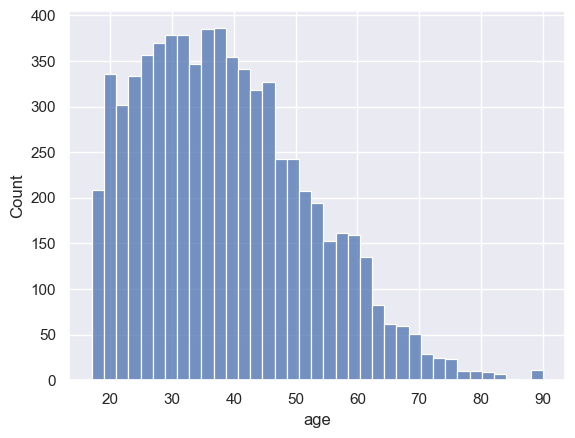

In [8]:
sns.histplot(data=df, x="age")

<Axes: xlabel='hours-per-week', ylabel='Count'>

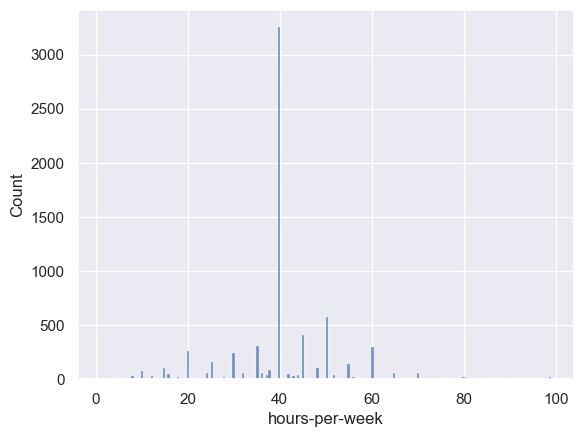

In [9]:
sns.histplot(data=df, x="hours-per-week")

### Produce a Histogram of a Logarithm of the Same Feature

<Axes: xlabel='age', ylabel='Count'>

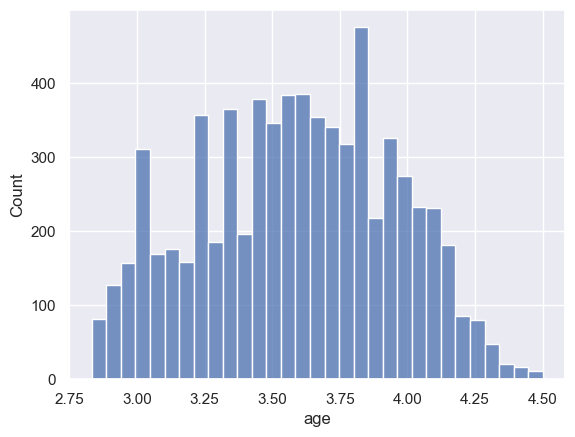

In [10]:
sns.histplot(data=np.log(df['age']))

<Axes: xlabel='age', ylabel='Count'>

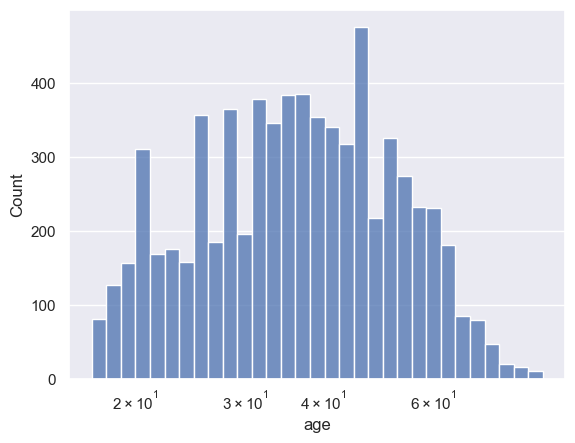

In [11]:
sns.histplot(data=df, x="age", log_scale=True)

It is often useful to re-scale the plot to zoom in on the part of the y-axis range where some values are observed. To do so, we would like to re-draw the plot with the y axis ranging from 0 to around 600. We can use the `matplotlib.pyplot.ylim()` function to accomplish this.

(0.0, 600.0)

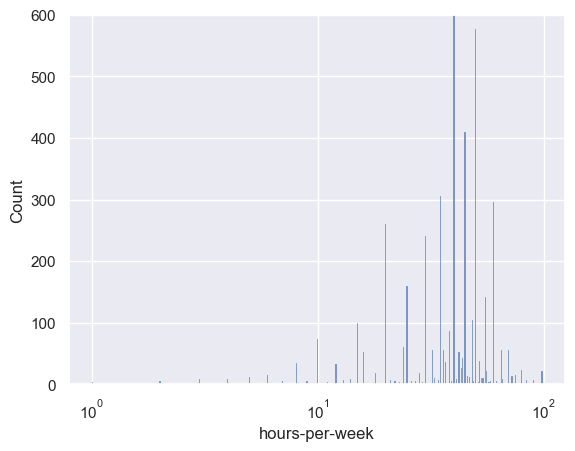

In [12]:
sns.histplot(data=df, x="hours-per-week", log_scale = True)
plt.ylim(0, 600)

###  Produce a Bar Plot for a Categorical Feature

The histogram plotting method may as well be used on categorical variables. The cell below plots the `education` column.

<Axes: xlabel='education', ylabel='Count'>

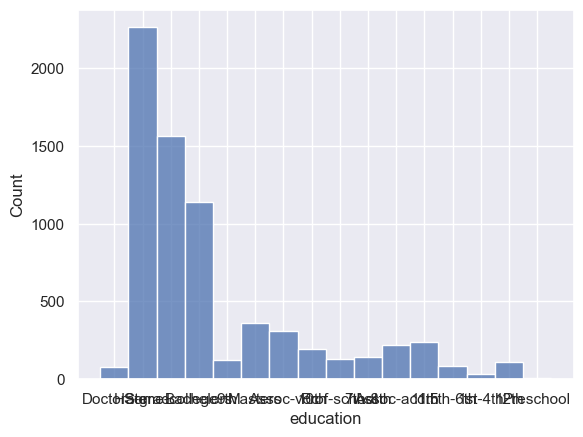

In [13]:
sns.histplot(data=df, x="education")

Notice that the labels overlap, making it difficult to read. One solution would be to rescale the image, and another one would be to rotate the labels. The code cell below accomplishes both.

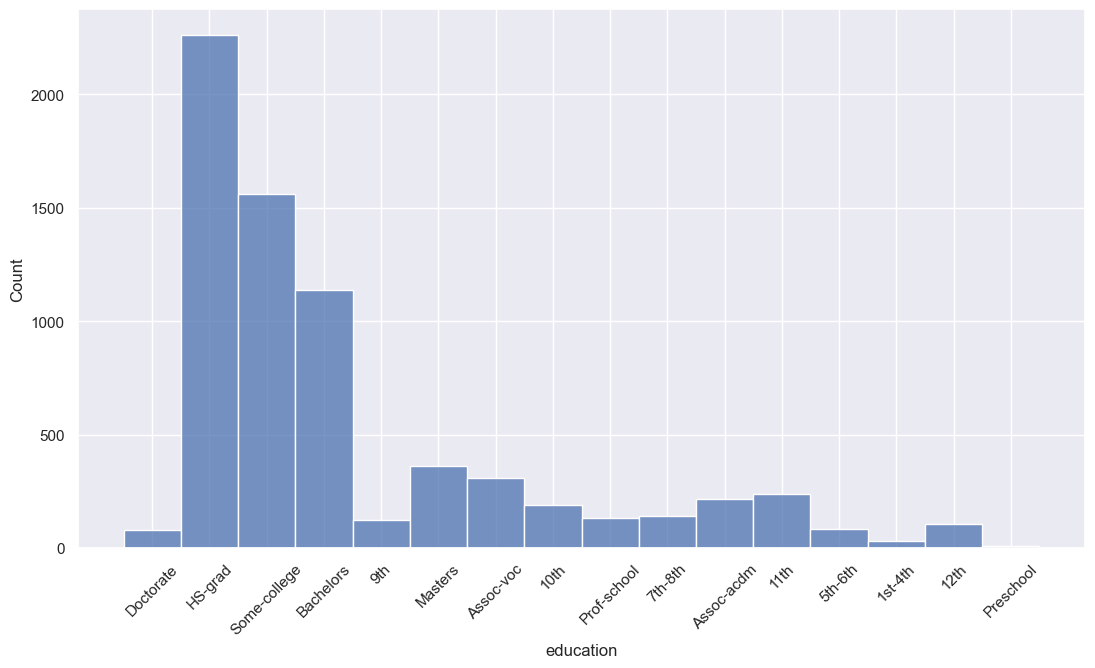

In [14]:
fig1 = plt.figure(figsize=(13,7)) # this is to rescale an image so that it is easier to read
ax = sns.histplot(data=df, x="education")
t1 = plt.xticks(rotation=45) # rotate the x-axis ticks labels

## Deep Dive: Enforcing an Order of Categories

The plot we made looks nice, but you may still find one aspect of it wanting. 'Education' levels have a natural *order* to them, and it would be much better to organize the categories of 'education' accordingly. That is: <br>

Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

The data type for the `education` column is `Object`.

In [15]:
np.dtype(df['education'])

dtype('O')

Python has built-in functionality for recognizing the order of categorical variables. The column must be converted from an `object` type to a `category`.

In [16]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']
df['education'] = pd.Categorical(df['education'], cat_order)

Now that we converted the `education` column in the dataset to an ordered categorical variable, let's reuse the same plotting code we used above:

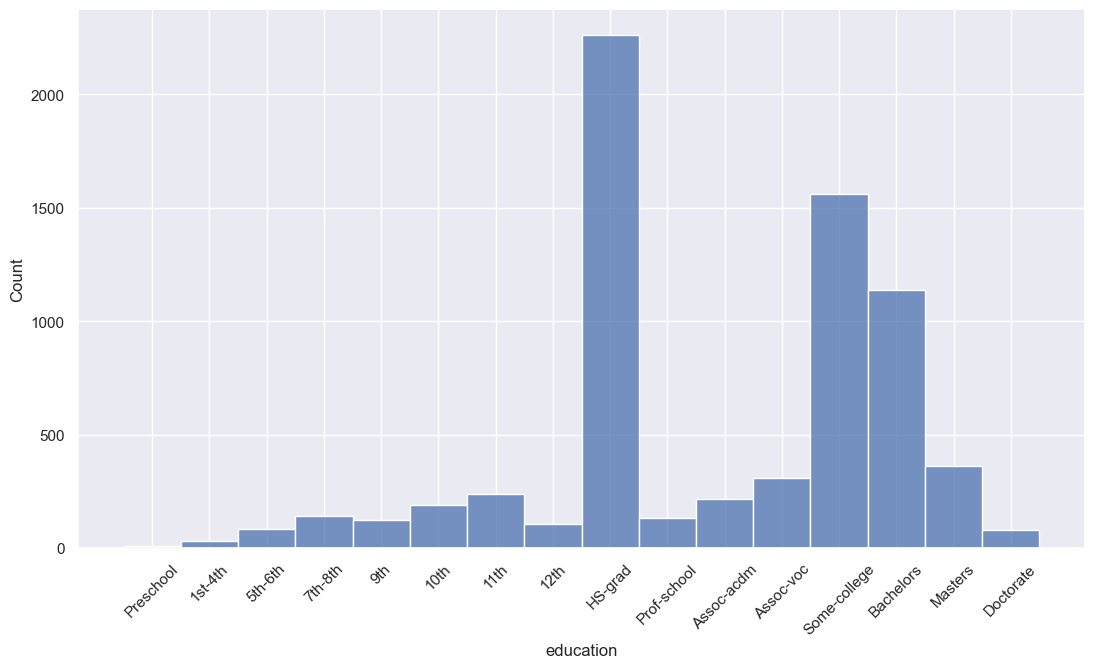

In [17]:
fig2 = plt.figure(figsize=(13,7)) 
ax = sns.histplot(data=df, x="education")
t2 = plt.xticks(rotation=45)

This plot is much easier to understand and analyze!